<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


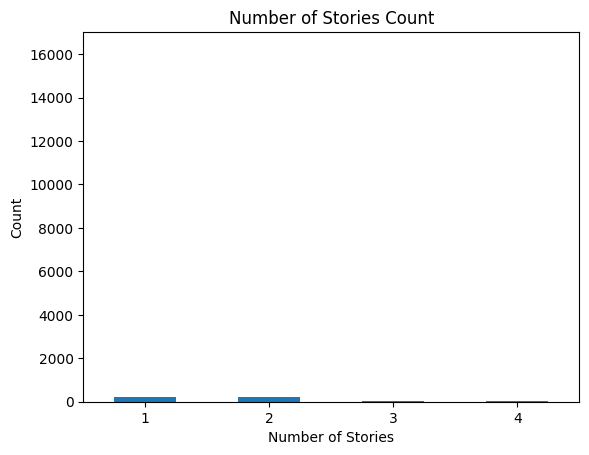

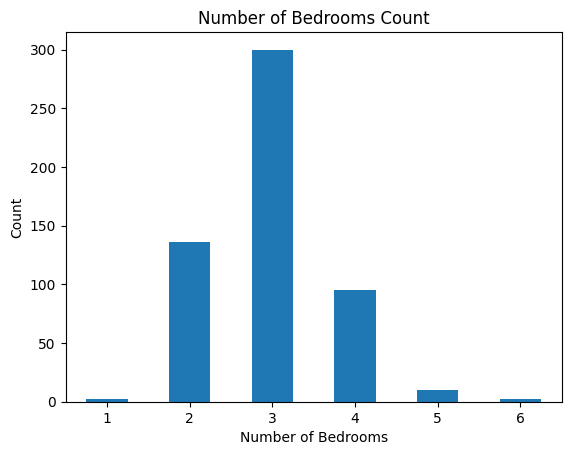

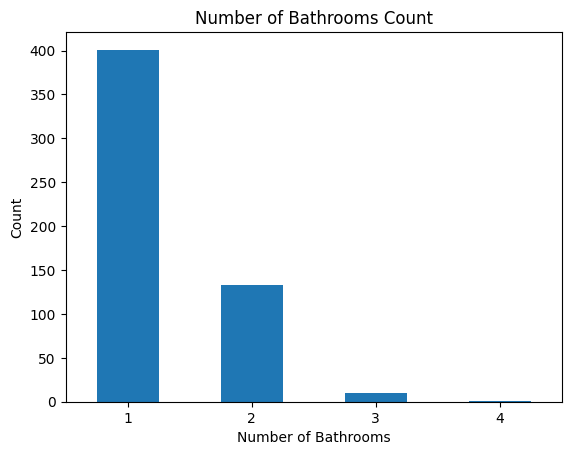

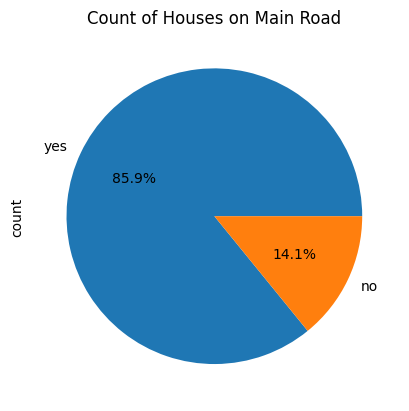

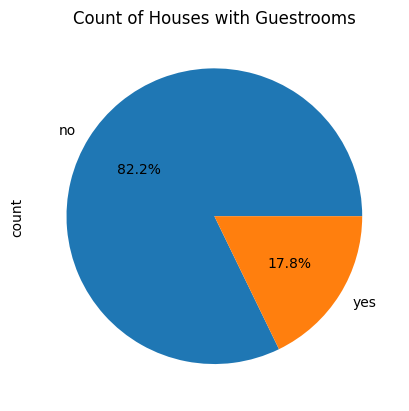

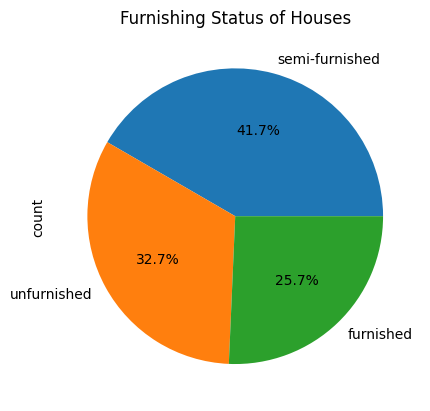

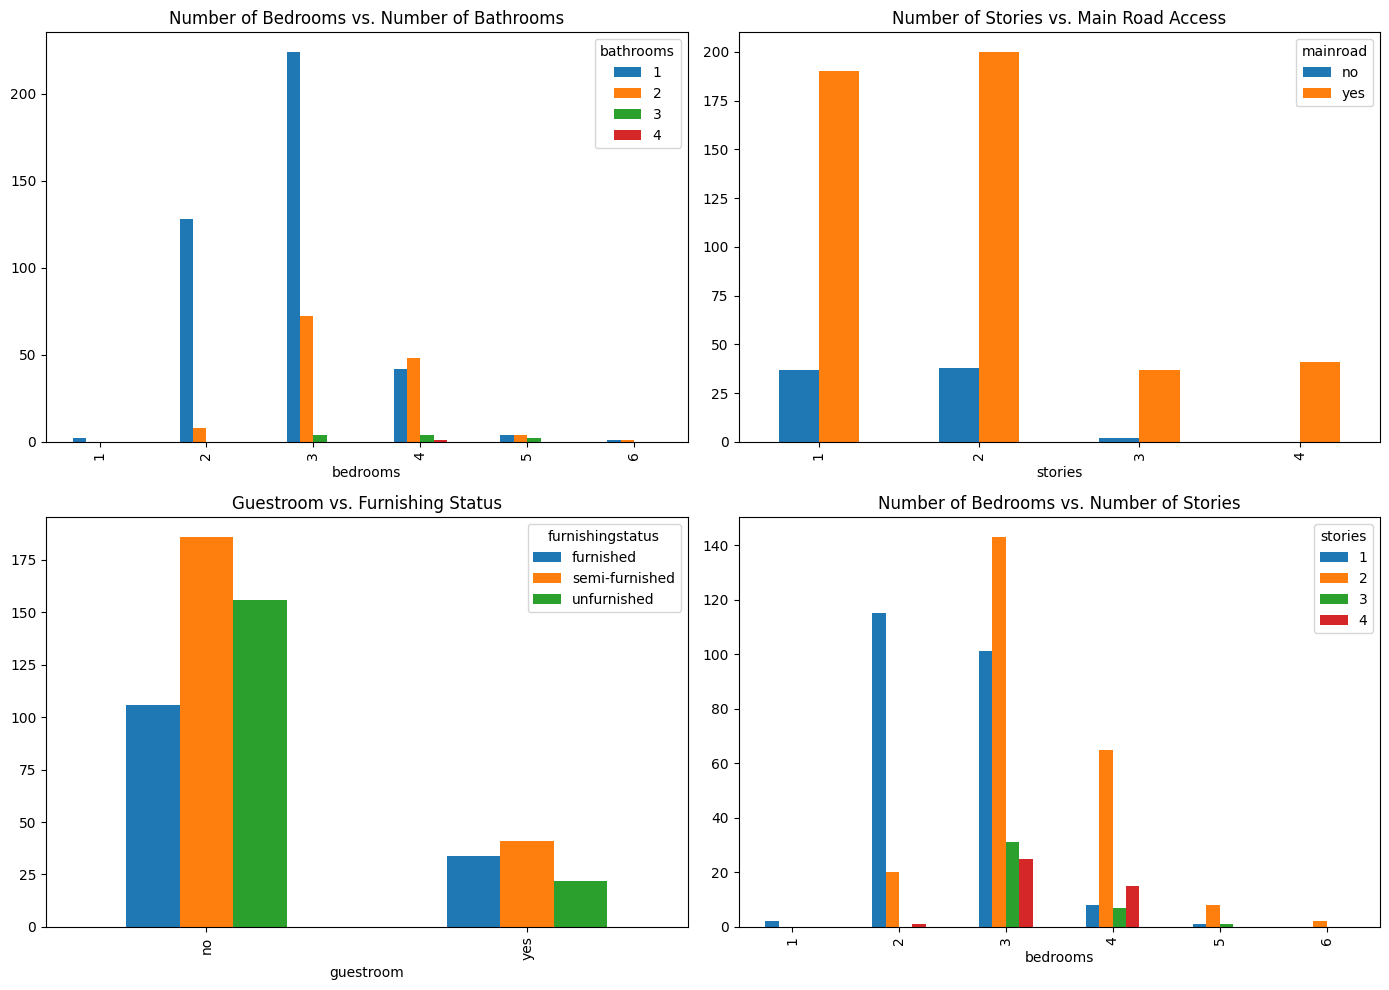

Mean Absolute Error: 0.08482075249315936
Mean Squared Error: 0.013281243729270737
R-squared: 0.6494754192267794


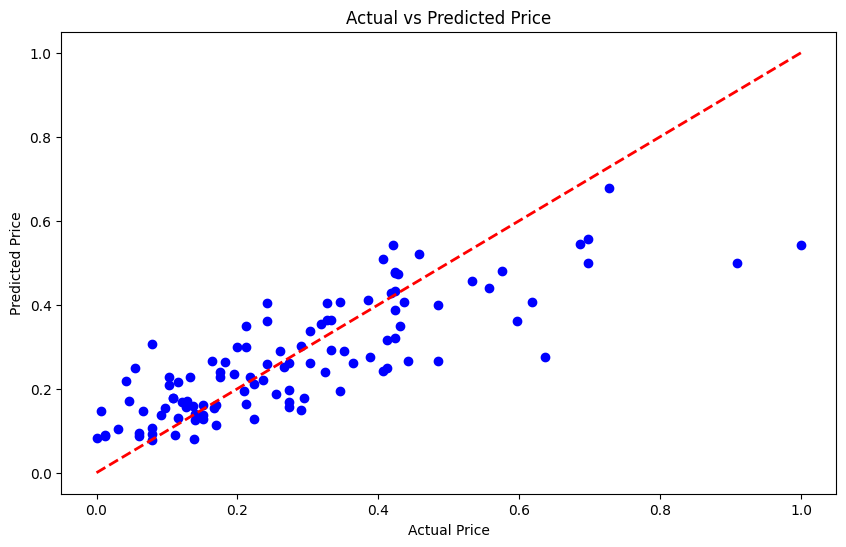

                  Coefficient
area                 0.297108
bedrooms             0.034015
bathrooms            0.284966
stories              0.105513
mainroad             0.031760
guestroom            0.020186
basement             0.034040
hotwaterheating      0.059557
airconditioning      0.068013
parking              0.058638
prefarea             0.054537
furnishingstatus    -0.036432


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

# Load the dataset
df = pd.read_csv("/content/Housing.csv")

# Display the first 10 rows
df.head(10)

# Describe the dataset
df.describe()

# Info about the dataset
df.info()

# Check for missing values
df.isnull().sum()

# Check for duplicate rows
df.duplicated().sum()

# Display the dataset
df

# Scatter plot for price vs area
df.plot(kind='scatter', x='price', y='area', s=32, alpha=0.5)

# Bar plot for stories count
stories_count = df['stories'].value_counts()
stories_count = stories_count.sort_index()
stories_count.plot(kind='bar')
plt.title('Number of Stories Count')
plt.xlabel('Number of Stories')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

# Bar plot for bedrooms count
bedrooms_count = df['bedrooms'].value_counts()
bedrooms_count_sorted = bedrooms_count.sort_index()
bedrooms_count_sorted.plot(kind='bar')
plt.title('Number of Bedrooms Count')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

# Bar plot for bathrooms count
bathrooms_count = df['bathrooms'].value_counts()
bathrooms_count_sorted = bathrooms_count.sort_index()
bathrooms_count_sorted.plot(kind='bar')
plt.title('Number of Bathrooms Count')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

# Pie chart for houses on the main road
mainroad_count = df['mainroad'].value_counts()
mainroad_count.plot(kind='pie', autopct='%1.1f%%')
plt.title('Count of Houses on Main Road')
plt.show()

# Pie chart for houses with guest rooms
guestroom_count = df['guestroom'].value_counts()
guestroom_count.plot(kind='pie', autopct='%1.1f%%')
plt.title('Count of Houses with Guestrooms')
plt.show()

# Pie chart for furnishing status of houses
furnishing_status = df['furnishingstatus'].value_counts()
furnishing_status.plot(kind='pie', autopct='%1.1f%%')
plt.title('Furnishing Status of Houses')
plt.show()

# Crosstab plots for the relationship between features
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14,10))

bedrooms_bathrooms = pd.crosstab(df['bedrooms'], df['bathrooms'])
bedrooms_bathrooms.plot(kind='bar', ax=axes[0,0])
axes[0,0].set_title('Number of Bedrooms vs. Number of Bathrooms')

stories_mainroad = pd.crosstab(df['stories'], df['mainroad'])
stories_mainroad.plot(kind='bar', ax=axes[0,1])
axes[0,1].set_title('Number of Stories vs. Main Road Access')

guestroom_furnishing = pd.crosstab(df['guestroom'], df['furnishingstatus'])
guestroom_furnishing.plot(kind='bar', ax=axes[1,0])
axes[1,0].set_title('Guestroom vs. Furnishing Status')

bedrooms_stories = pd.crosstab(df['bedrooms'], df['stories'])
bedrooms_stories.plot(kind='bar', ax=axes[1,1])
axes[1,1].set_title('Number of Bedrooms vs. Number of Stories')

plt.tight_layout()
plt.show()

# Encode categorical variables
label_encoder = LabelEncoder()
df['mainroad'] = label_encoder.fit_transform(df['mainroad'])
df['guestroom'] = label_encoder.fit_transform(df['guestroom'])
df['basement'] = label_encoder.fit_transform(df['basement'])
df['hotwaterheating'] = label_encoder.fit_transform(df['hotwaterheating'])
df['airconditioning'] = label_encoder.fit_transform(df['airconditioning'])
df['prefarea'] = label_encoder.fit_transform(df['prefarea'])
df['furnishingstatus'] = label_encoder.fit_transform(df['furnishingstatus'])

# Normalize the dataset
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

# Split the data into training and testing sets
X = df_scaled.drop('price', axis=1)
y = df_scaled['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Plot the actual vs predicted values
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([0, 1], [0, 1], '--', color='red', linewidth=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Price')
plt.show()

# Display the model coefficients
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)
